2022-01-27 11:09:44,277:INFO:tfsa data loaded: in load_data


           Ticker Type  Quantity   Price  Fees Currency
Date                                                   
2021-09-30   ARKF  Buy         6   49.61     0      USD
2021-09-30   HTGC  Buy        25   15.16     5      USD
2021-09-30    IBB  Buy         4  155.91     0      USD
2021-09-30   KBWD  Buy        20   20.57     0      USD
2021-09-30    LIT  Buy         4   80.86     0      USD


2022-01-27 11:09:44,714:INFO:SRU-UN.TO: error in trx date (2022-01-17 00:00:00), NYSE market not open. open qty set to 0: in daily_pnl


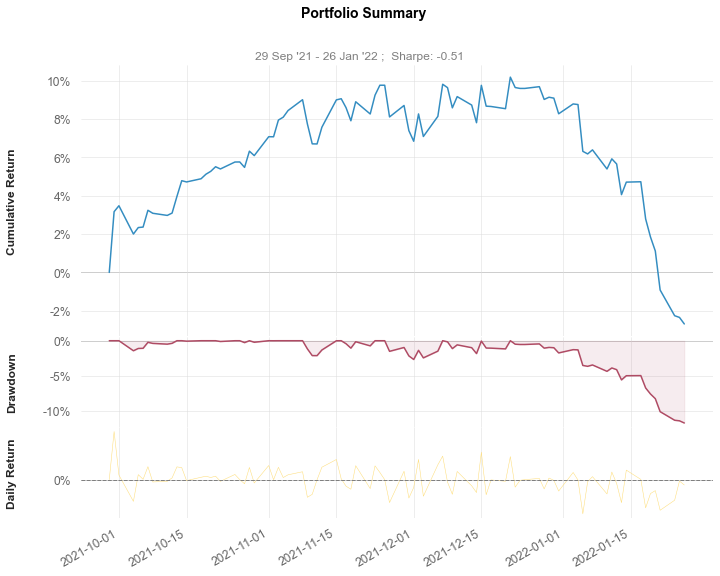

In [3]:
import logging
from portfolio import Portfolio
import quantstats as qs

logging.getLogger().setLevel(logging.INFO)

ptf = Portfolio(account='tfsa', currency="CAD")

# Transactions
print(ptf.transactions.head())

pnl = ptf.pct_daily_total_pnl(start_date=ptf.start_date)
qs.plots.snapshot(pnl)

In [4]:
import reporting.reporting as report
from datetime import datetime

# we can generate full html reports
ptf = Portfolio(account='tfsa', currency="CAD")
ptf.update_data()
report.full_html(pnl, "SPY", name=f"tfsa_{datetime.today().date()}", rf=0.)


2022-01-27 11:10:09,465:INFO:tfsa data loaded: in load_data
2022-01-27 11:10:25,458:INFO:tfsa data loaded: in load_data
2022-01-27 11:10:25,465:INFO:tfsa updated: in update_data


In [8]:
from transaction import Transaction

new_ptf = Portfolio("TEST111", currency="USD")
trx = Transaction(date=datetime(2022, 1, 24),
            ticker="AAPL",
            type="Buy",
            quantity=10,
            price=120.,
            fees=0.,
            currency="USD")

new_ptf.add_transaction(trx)

print(new_ptf.transactions)

2022-01-24 19:26:19,160:ERROR:TEST111: Not enough funds to perform this transaction, missing 1200.0 to complete: in add_transaction


Empty DataFrame
Columns: [Ticker, Type, Quantity, Price, Fees, Currency]
Index: []


We need to add cash to the portfolio before hand